### 读取数据

In [31]:
import numpy as np
import pandas as pd
%cd /Users/MIAOKUI/Documents/机器学习/LearningAI/BikeRent

## Read data
b_train = pd.read_csv('data/bike_train.csv')
print(b_train.head())

/Users/MIAOKUI/Documents/机器学习/LearningAI/BikeRent
              datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3  2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4  2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1  


In [32]:
## 字段名称和类型
print(b_train.dtypes)

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object


In [33]:
## 数据量
print(b_train.shape)

(10886, 12)


In [34]:
## 列名
print(b_train.columns)

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')


In [35]:
## 把月，日，和小时单独拿出来，放在3列中
b_train['month'] = pd.DatetimeIndex(b_train.datetime).month
b_train['day'] = pd.DatetimeIndex(b_train.datetime).month
b_train['hour'] = pd.DatetimeIndex(b_train.datetime).hour

In [36]:
## 去除不相关信息
b_train = b_train.drop(['datetime', 'casual', 'registered'], axis=1)

In [37]:
b_train.to_csv('b2_train.csv')

### 初步数据展示

In [49]:
import matplotlib.pyplot as plt
b2_train = pd.read_csv('b2_train.csv', index_col=0)
b2_train_target = b_train['count']
b2_train_data = b_train.drop(['count'], axis = 1)

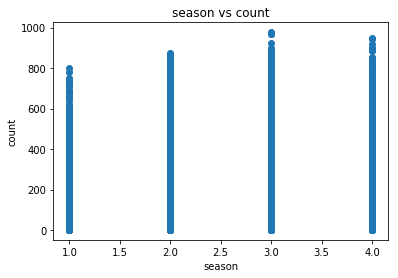

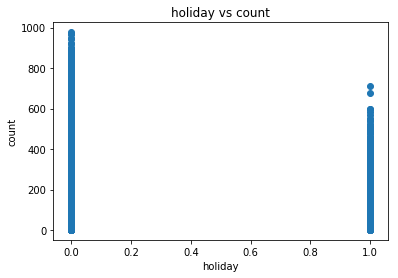

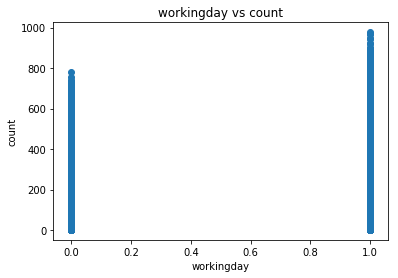

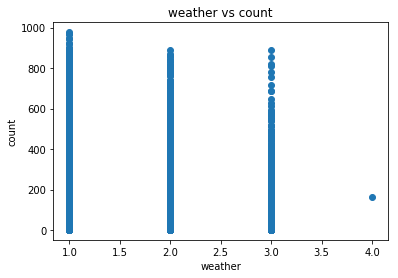

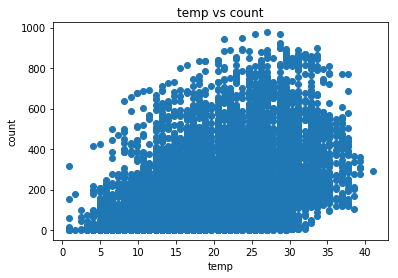

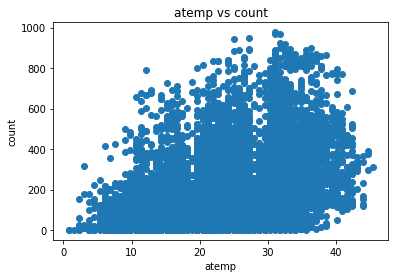

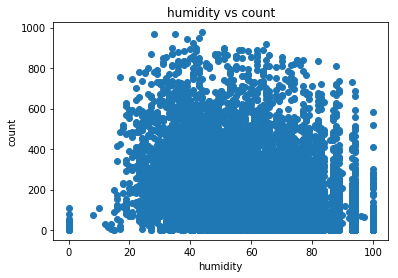

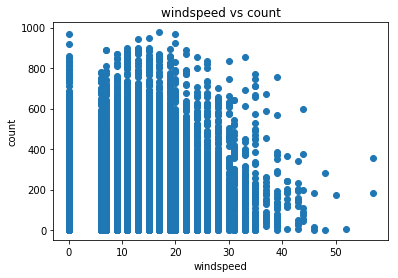

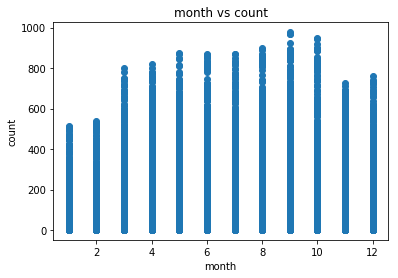

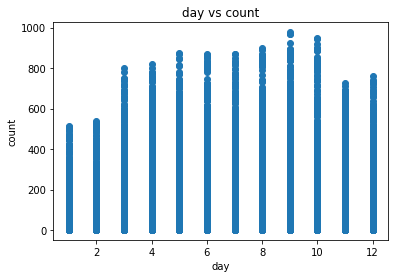

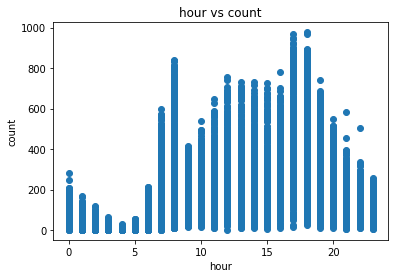

In [50]:
for fn in b2_train_data.columns:
    plt.scatter(b2_train[fn], b2_train['count'])
    plt.xlabel(fn)
    plt.ylabel('count')
    plt.title(fn + ' vs count')
    plt.show()

### 交叉验证模型

In [62]:
from sklearn import model_selection

## 按照20比80来拆分测试集和训练集
cv = model_selection.ShuffleSplit(test_size=0.25, random_state=121)
for i,j in cv.split(b2_train_data, b2_train_target):
    print(len(i), len(j))

8164 2722
8164 2722
8164 2722
8164 2722
8164 2722
8164 2722
8164 2722
8164 2722
8164 2722
8164 2722


In [69]:
from sklearn import svm
## 测试支持向量机
print("SVR(kernel='rbf',C=10,gamma=.001)")
for train_idx, test_idx in cv.split(b2_train_data, b2_train_target):
    train_data = b2_train_data.loc[train_idx].values
    test_data = b2_train_data.loc[test_idx].values
    train_target = b2_train_target.loc[train_idx].values
    test_target = b2_train_target.loc[test_idx].values
    
    svc = svm.SVR(kernel='rbf', C=10, gamma=0.001)
    svc.fit(train_data, train_target)
    print("train score: {0:.3f}, test score: {1:.3f}\n".format(
    svc.score(train_data, train_target), 
        svc.score(test_data, test_target)))
    


SVR(kernel='rbf',C=10,gamma=.001)


train score: 0.407, test score: 0.417



train score: 0.412, test score: 0.403



train score: 0.410, test score: 0.406



train score: 0.413, test score: 0.405



train score: 0.413, test score: 0.419



train score: 0.416, test score: 0.399



train score: 0.407, test score: 0.424



train score: 0.406, test score: 0.424



train score: 0.414, test score: 0.402



train score: 0.413, test score: 0.407



In [70]:
from sklearn.ensemble import RandomForestRegressor

print("Random Forest(n_estimators = 100)")
for train_idx, test_idx in cv.split(b2_train_data, b2_train_target):
    train_data = b2_train_data.loc[train_idx].values
    test_data = b2_train_data.loc[test_idx].values
    train_target = b2_train_target.loc[train_idx].values
    test_target = b2_train_target.loc[test_idx].values
    
    rdr = RandomForestRegressor(n_estimators=100)
    svc.fit(train_data, train_target)
    print("train score: {0:.3f}, test score: {1:.3f}\n".format(
    svc.score(train_data, train_target), 
        svc.score(test_data, test_target)))

Random Forest(n_estimators = 100)


train score: 0.407, test score: 0.417



train score: 0.412, test score: 0.403



train score: 0.410, test score: 0.406



train score: 0.413, test score: 0.405



train score: 0.413, test score: 0.419



train score: 0.416, test score: 0.399



train score: 0.407, test score: 0.424



train score: 0.406, test score: 0.424



train score: 0.414, test score: 0.402



train score: 0.413, test score: 0.407

